# Exploratory Data Anlysis

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objs as go

## S1: Data Description

1. Read in csv file into pandas dataframe

In [2]:
data_df = pd.read_csv("all_data.csv")

In [3]:
original_df = pd.read_csv('all_data.csv')

2. Visualize the dataframe to gain a basic understanding of features and samples

In [4]:
data_df.head()

state  legality  year  ab_rate  education  labour_force_participation  \
0      Alaska         1  2011    11.20   0.908187                       0.837   
1     Alabama         0  2011     9.90   1.091045                       0.780   
2    Arkansas         0  2011     7.10   1.007538                       0.815   
3     Arizona         1  2011    11.30   0.994282                       0.762   
4  California         1  2011    22.99   1.008387                       0.745   

   bachelor_wage_gap  state_legislature  rape_rate  life_exp_f_m  state_gov  
0              -17.5              0.233       60.2      1.062699          0  
1              -25.2              0.136       28.5      1.076426          1  
2              -17.5              0.222       41.9      1.074114          0  
3              -19.4              0.344       38.6      1.061571          1  
4              -19.3              0.283       20.3      1.057082          0

In [5]:
data_df.columns

Index(['state', 'legality', 'year', 'ab_rate', 'education',
       'labour_force_participation', 'bachelor_wage_gap', 'state_legislature',
       'rape_rate', 'life_exp_f_m', 'state_gov'],
      dtype='object')

In [6]:
round(data_df.describe() ,3)

legality      year  ab_rate  education  labour_force_participation  \
count   500.000   500.000  500.000    500.000                     500.000   
mean      0.720  2015.500   10.826      1.027                       0.829   
std       0.449     2.875    5.751      0.045                       0.041   
min       0.000  2011.000    0.100      0.858                       0.732   
25%       0.000  2013.000    6.375      1.004                       0.803   
50%       1.000  2015.500   10.050      1.028                       0.826   
75%       1.000  2018.000   13.525      1.060                       0.862   
max       1.000  2020.000   30.200      1.119                       0.929   

       bachelor_wage_gap  state_legislature  rape_rate  life_exp_f_m  \
count            500.000            500.000    500.000       500.000   
mean             -20.284              0.254     41.277         1.065   
std                3.644              0.076     17.820         0.009   
min              -32.100              0.094     11.400         1.044   
25%              -22.225              0.199     31.075         1.059   
50%              -20.100              0.253     38.600         1.064   
75%              -18.200              0.304     47.100         1.071   
max              -10.200              0.540    161.600         1.096   

       state_gov  
count    500.000  
mean       0.376  
std        0.485  
min        0.000  
25%        0.000  
50%        0.000  
75%        1.000  
max        1.000

We have 500 samples and 15 features

3. Check missing values

In [7]:
null_sum = data_df.isnull().sum()
null_sum

state                         0
legality                      0
year                          0
ab_rate                       0
education                     0
labour_force_participation    0
bachelor_wage_gap             0
state_legislature             0
rape_rate                     0
life_exp_f_m                  0
state_gov                     0
dtype: int64

There is no missing data in our dataset, because when we collected data for seperate features, our data source was census data which appeared to contain no NaN

4. Check column types

In [8]:
data_df.dtypes

state                          object
legality                        int64
year                            int64
ab_rate                       float64
education                     float64
labour_force_participation    float64
bachelor_wage_gap             float64
state_legislature             float64
rape_rate                     float64
life_exp_f_m                  float64
state_gov                       int64
dtype: object

## S2: Visualization of relation between features and target value

### 1. Explore the relation between political empowerment and rape rate

Text(0.5, 1.0, 'Bar graph between female governer and rape rate')

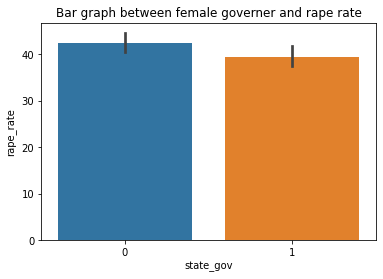

In [9]:
sns.barplot(data=data_df, x="state_gov", y="rape_rate")
plt.title("Bar graph between female governer and rape rate")

Use boxplot to detect and drop outliers

In [10]:
Q1 = data_df["state_legislature"].quantile(0.25)
Q3 = data_df["state_legislature"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.199, 0.30425, 0.041124999999999995, 0.462125)

In [11]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["state_legislature"] > upper_thresh].index, inplace=True)
data_df.drop(data_df[data_df["state_legislature"] < lower_thresh].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (500, 11)
Data size after dropping: (498, 11)


### 2. Explore the relation between education gender gap and rape rate

2.1 Use boxplot to detect and drop outliers

In [12]:
# Detect high school graduates gender gap outliers
Q1 = data_df["education"].quantile(0.25)
Q3 = data_df["education"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1.0043176952839885, 1.059550113160146, 0.9214690684697524, 1.142398739974382)

In [13]:
# Drop high school graduates gender gap outliers
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["education"] > upper_thresh].index, inplace=True)
data_df.drop(data_df[data_df["education"] < lower_thresh].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (498, 11)
Data size after dropping: (481, 11)


### 3. Explore the relation between economic gender gap and rape rate

3.1 Use boxplot to detect and drop outliers for economic gender gap

In [14]:
# Detect labor force participation gender gap
Q1 = data_df["labour_force_participation"].quantile(0.25)
Q3 = data_df["labour_force_participation"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.803, 0.863, 0.7130000000000001, 0.9529999999999998)

In [15]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["labour_force_participation"] > upper_thresh].index, inplace=True)
data_df.drop(data_df[data_df["labour_force_participation"] < lower_thresh].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (481, 11)
Data size after dropping: (481, 11)


In [16]:
# Detect bachelor wage gender gap
Q1 = data_df["bachelor_wage_gap"].quantile(0.25)
Q3 = data_df["bachelor_wage_gap"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(-22.4, -18.3, -28.549999999999997, -12.150000000000004)

In [17]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["bachelor_wage_gap"] > upper_thresh].index, inplace=True)
data_df.drop(data_df[data_df["bachelor_wage_gap"] < lower_thresh].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (481, 11)
Data size after dropping: (464, 11)


### 4. Explore the relation between health gender gap and rape rate

4.1 Use boxplot to detect and drop outliers for health gender gap

In [18]:
# Detect life expectancy gender gap
Q1 = data_df["life_exp_f_m"].quantile(0.25)
Q3 = data_df["life_exp_f_m"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1.0593220338983051, 1.070663811563169, 1.0423093674010093, 1.0876764780604649)

In [19]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["life_exp_f_m"] > upper_thresh].index, inplace=True)
data_df.drop(data_df[data_df["life_exp_f_m"] < lower_thresh].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (464, 11)
Data size after dropping: (457, 11)


### 5. Explore relation between abortion and rape rate

Text(0.5, 1.0, 'Bar graph between abortion legality and rape rate')

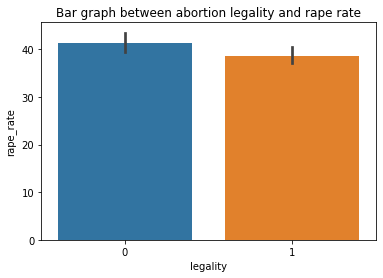

In [20]:
sns.barplot(data=data_df, x="legality", y="rape_rate")
plt.title("Bar graph between abortion legality and rape rate")

In [21]:
# Detect abortion rate outliers
Q1 = data_df["ab_rate"].quantile(0.25)
Q3 = data_df["ab_rate"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(6.6, 13.9, -4.350000000000001, 24.85)

In [22]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["ab_rate"] > upper_thresh].index, inplace=True)
data_df.drop(data_df[data_df["ab_rate"] < lower_thresh].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (457, 11)
Data size after dropping: (438, 11)


### A comprehensive visualization of the relationship between features and target variables

* Without dropping any outliers

In [23]:
data_df

state  legality  year  ab_rate  education  \
1         Alabama         0  2011     9.90   1.091045   
2        Arkansas         0  2011     7.10   1.007538   
3         Arizona         1  2011    11.30   0.994282   
4      California         1  2011    22.99   1.008387   
5        Colorado         1  2011    10.10   0.993061   
..            ...       ...   ...      ...        ...   
490  South Dakota         0  2020     0.80   0.987658   
492         Texas         0  2020     9.50   1.024669   
494      Virginia         1  2020    11.00   1.031591   
496    Washington         1  2020    11.70   0.985292   
497     Wisconsin         0  2020     6.40   1.032818   

     labour_force_participation  bachelor_wage_gap  state_legislature  \
1                         0.780              -25.2              0.136   
2                         0.815              -17.5              0.222   
3                         0.762              -19.4              0.344   
4                         0.745              -19.3              0.283   
5                         0.780              -23.7              0.410   
..                          ...                ...                ...   
490                       0.901              -21.4              0.248   
492                       0.745              -23.2              0.249   
494                       0.820              -26.5              0.286   
496                       0.796              -21.4              0.408   
497                       0.799              -20.2              0.258   

     rape_rate  life_exp_f_m  state_gov  
1         28.5      1.076426          1  
2         41.9      1.074114          0  
3         38.6      1.061571          1  
4         20.3      1.057082          0  
5         44.7      1.054852          0  
..         ...           ...        ...  
490       67.1      1.069519          1  
492       46.0      1.076426          0  
494       26.5      1.066098          0  
496       34.8      1.061571          0  
497       34.6      1.068376          0  

[438 rows x 11 columns]

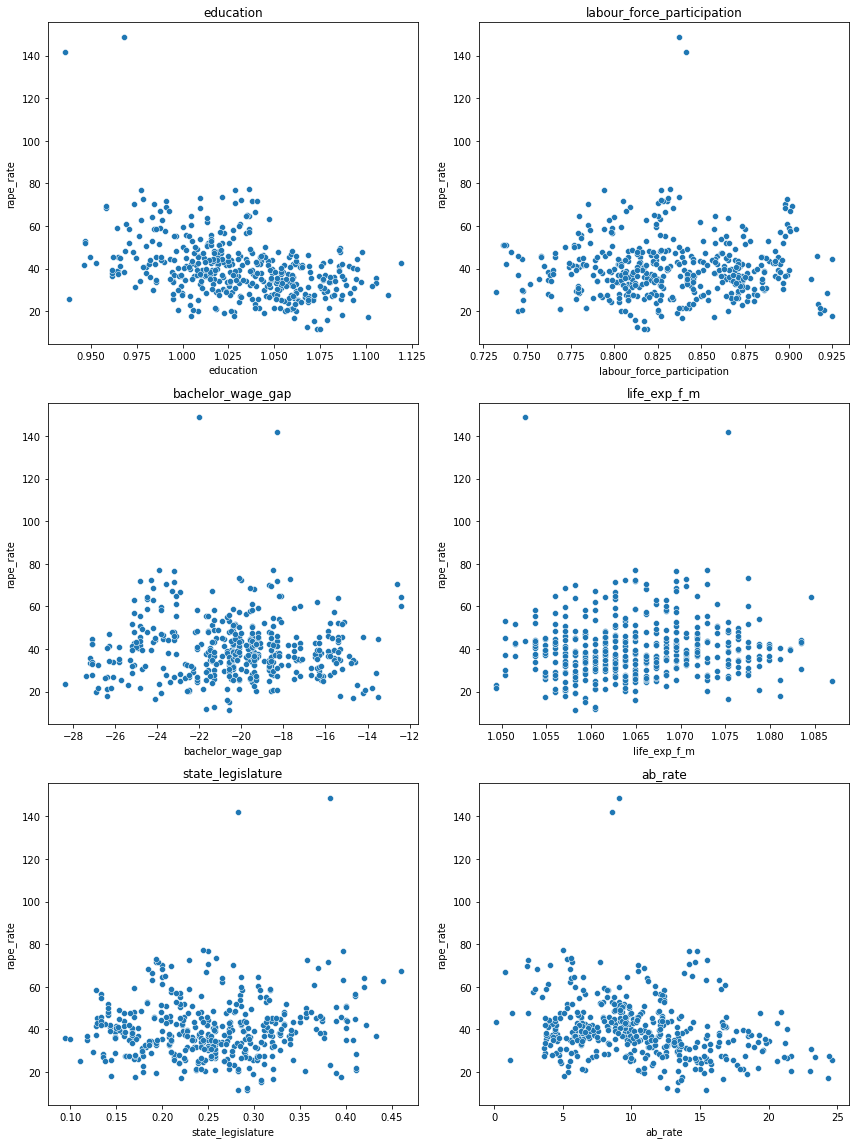

In [24]:
data = data_df[["education", "labour_force_participation", 
                "bachelor_wage_gap", "life_exp_f_m", 
                "state_legislature", "ab_rate", "rape_rate"]]
fig, axs = plt.subplots(3, 2, figsize=(12, 16))

for i in range(3):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns) - 1:
            sns.scatterplot(data=data, x=data.columns[col], y="rape_rate", ax=axs[i][j])
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Observations</b>

* We observe a negative correlation between education and rape rate, which means females receiving more education is likely to correspond to a lower rape rate, which is intuitive and also proved by research.

* We see a negative relation between sex ratio at birth (female/male) and rape rate, which means the higher proportion of male at birth population is likely to correspond to a higher rape rate.

* We see a negative relation between abortion rate and rape rate.

* Overall, each individual feature is not strongly correlated to our target value -- rape rate. This is probabily because these features are interconnected and mediated by other hidden fators.

## S3: Visualization of Features and Distribution

### A Comprehensive Visualization

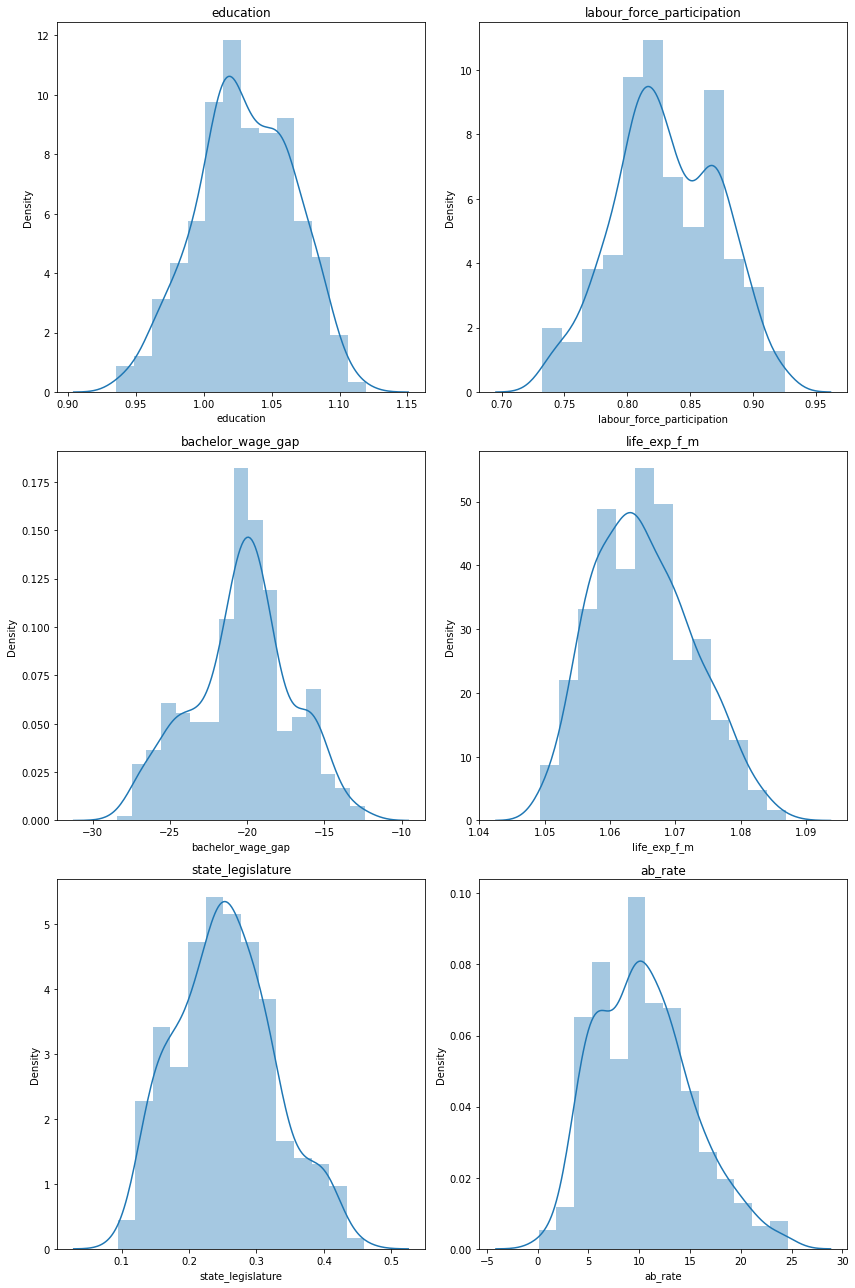

In [25]:
data = data_df[["education", "labour_force_participation", 
           "bachelor_wage_gap", "life_exp_f_m", 
           "state_legislature", "ab_rate"]]
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

for i in range(3):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns):
            sns.distplot(data[data.columns[col]], ax=axs[i][j], kde=True)
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Observations</b>

1. From the first distribution, we see that the mean of education gender gap is around 1.03. This means female comprise a larger proportion of the total high school or higher education.


2. We observe a significant gender gap in the economic field:
    * We see that the labor force participation distribution has a mean around 0.81 and skewed to the left. This mean and skewness indicate the male's dominance and female's marginalization in the labor force participation

3. We see the distribution of life expectancy ratio has a mean of 1.063, which means male tends to live shorter than female, which makes sense as the World Health Organization (WHO) showed the global life expectancy at birth for males in 2020 was 69 years, while for females it was 73 years.

5. We see the distribution of state legislature of women has a mean of 0.27, which is critically low. This mean indicates that among all positions, of which female only occupy 27 percent.

## S4: Explore the Relation Between Features and Abortion Rate

### Complete Visualization between Features and Abortion Rate

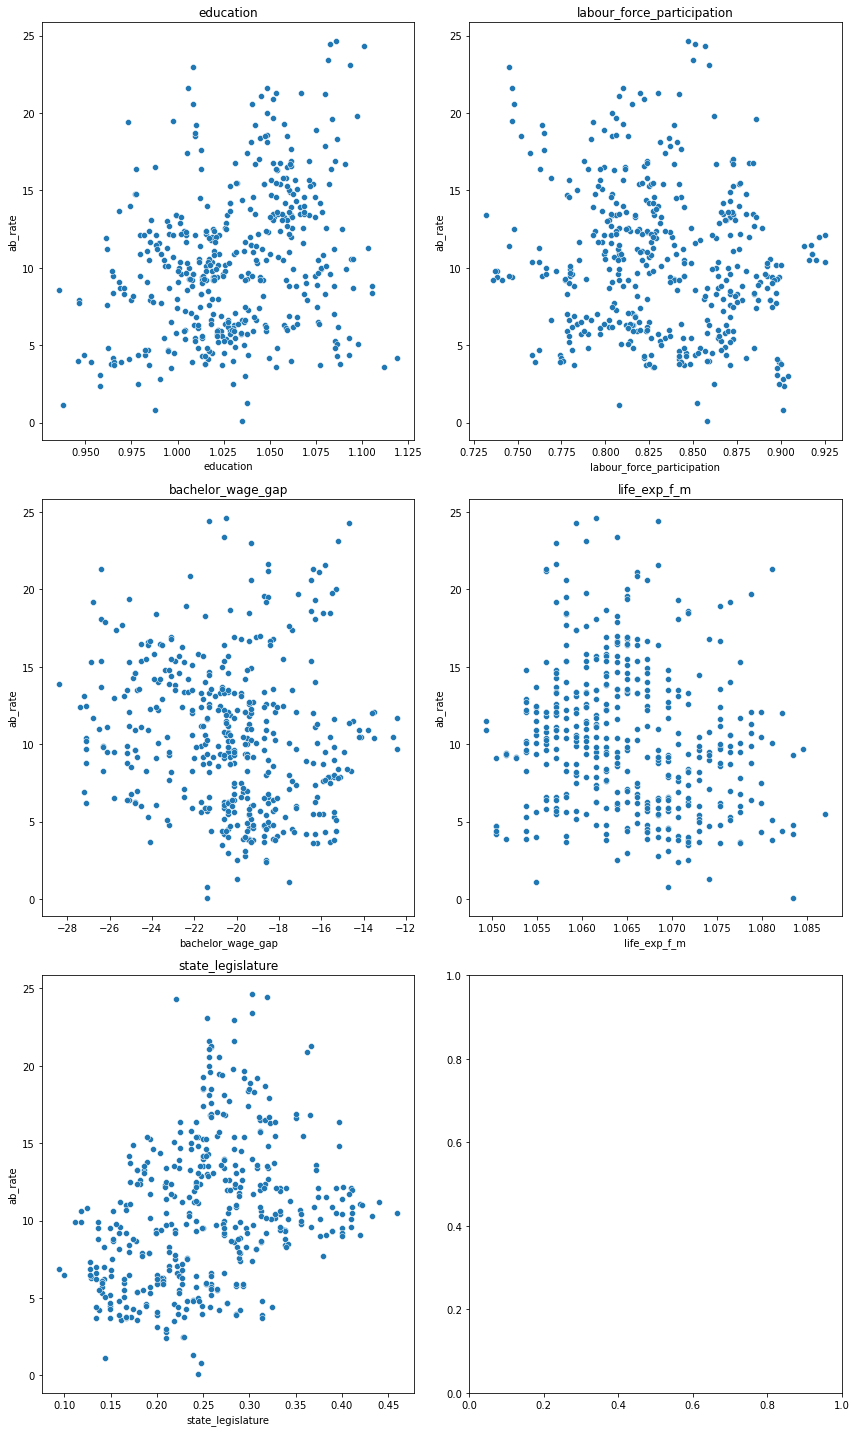

In [26]:
data = data_df[["education", "labour_force_participation", 
                "bachelor_wage_gap", "life_exp_f_m", 
                "state_legislature", "ab_rate"]]
fig, axs = plt.subplots(3, 2, figsize=(12, 20))

for i in range(3):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns) - 1:
            sns.scatterplot(data=data, x=data.columns[col], y="ab_rate", ax=axs[i][j])
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Observations on relation between features and abortion rate</b>

* From the first plot, we observe a positive correlation between education and abortion rate, which means more females receiving education than males is related to higher abortion rate.

## S5: Correlation Map

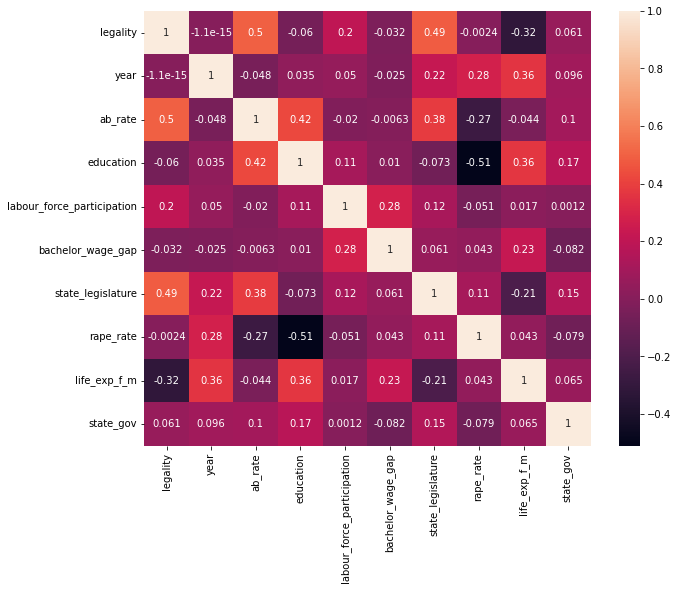

In [27]:
corrMtx = original_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrMtx, annot=True, ax=ax)
plt.show()

<b>Observations</b>

* The most salient correlations are between eudcation and rape rate, abortion legality and state legislature.

## S6: Visualization of Important Features by State Groups

* We explore the following features by grouping states based on 2020 data and display the top, bottom, and middle group to observe the trends.
    * state_legislature
    * life_exp_f_m
    * ab_rate
    * rape_rate

In [28]:
# Set the figure parameters
sns.set_style('whitegrid')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [29]:
def gen_figure(df, col_name, fig_title, y_axis_title):
    ''' This function creates a plotly figure object with the given params. '''
    
    # Calculate the rank percentage for each state in 2020
    df['pct_rank'] = df[df['year'] == 2020][col_name].rank(pct=True)

    # Divide states into three groups based on rank percentage
    df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], 
                         labels=[r'bottom 10%', r'10%-45%', r'45%-55%', r'55%-90%', r'top 10%'])

    # Process each state's data individually and store it in a dictionary
    states_data = {}
    for state, data in df.groupby('state'):
        # Sort the data by year
        data = data.sort_values('year')
        # Construct Plotly's Trace object
        trace = go.Scatter(
            x=data['year'],
            y=data[col_name],
            name=state,
            line=dict(width=2),
            mode='lines',
            text=data[col_name],
            hovertemplate='<b>%{text:.2f}%</b><brstate: %{name}<br>year: %{x}'
        )
        # Assign the corresponding color according to which group the state belongs to
        if r'bottom 10%' in data['group'].unique():
            trace.update(line=dict(color='#750D86'))
            states_data[state] = trace

        elif r'top 10%' in data['group'].unique():
            trace.update(line=dict(color='#FEAF16'))
            states_data[state] = trace

        elif r'45%-55%' in data['group'].unique():
            trace.update(line=dict(color='#00AB8B'))
            states_data[state] = trace

    # Construct Plotly's Figure object
    fig = go.Figure(list(states_data.values()))

    # Add a chart title and axis labels
    fig.update_layout(title=fig_title,
                    title_font_size=24,
                    legend_title='States:',
                    legend_font_size=14,
                    xaxis_title='Year',
                    yaxis_title=y_axis_title,
                    width=1000,
                    height=600)
    return fig

### 5.1 State Legislature by Year

In [30]:
gen_figure(original_df, 'state_legislature', 'State Legislature by Year', 'Female Proportion in State Legislature').show()

<h4> State legislature</h4>

* Proportion of women in legislature.
* In general, the trend is steady before 2018, with a slight increase after.
    * Colorado: stays the top 1 in female proportion in state legislature. 2018-2019 shows a sharp increase.
    * Hawaii: moved from the top 10% to the middle range (45%-55%)
    * Alaska: moved from the last in the middle range to the top 10% range
    * Oklahoma: shows a sharp increase from 2018-2019.

### 5.2 Life Expectancy by Year

In [31]:
gen_figure(original_df, 'life_exp_f_m', 'Life Expectancy (Female Over Male) by Year', 'Life Expectancy (female over male)')

<h4> Life Expectancy Gender Gap </h4>

* Life Expectancy of male over that of female
* In general, the trends across 15 states experience ocsilation at some extent. Furthermore, all 15 states share a decrease from 2019 to 2020. We also see some overlap between upper 10% states, the middle 10% states, and bottom 10% states

### 5.4 Abortion Rate by Year

In [32]:
gen_figure(original_df, 'ab_rate', 'Abortion Rate by Year', 'Abortion Rate')

<h4> Abortion Rate </h4>

* Divided the abortion occurrences of a state by its population and multiply by 100,000
* In general, the trends across 13 states are steady and share a comparatively low abortion rate except for New Hamshire and New Mexico; also, the differences between each state's abortion rate are small
    * New Hamshire: Observe an conspicuously high abortion rate compared to its counterpart states and salient fluctuation compared to the rest of the states. However, it has a sudden decrease from 2018 to 2019 and an increase from 2019 to 2020
    * New Mexico: While sharing a similarly low and steady trend as its counterparts, it had a drastic increase from 2017 to 2018, followed by a sudden decrease from 2018 to 2019, and then another sharp increase from 2019 to 2020

### 5.4 Rape Rate by Year

In [33]:
gen_figure(original_df, 'rape_rate', 'Rape Rate by Year', 'Rape Rate')

<h4> Abortion Rate

In [34]:
q1 = data_df.groupby(['year'])['ab_rate'].quantile(0.25).reset_index()
q3 = data_df.groupby(['year'])['ab_rate'].quantile(0.75).reset_index()

# combine data
grouped = original_df.groupby(['year'])['ab_rate'].agg(['max', 'min', 'median']).reset_index()
grouped = pd.merge(grouped, q1, on='year')
grouped = pd.merge(grouped, q3, on='year')

# create scatter plot data
data = [
    go.Scatter(
        x=q3['year'],
        y=q3['ab_rate'],
        name='Upper Quartile',
        mode='markers+lines',
        line=dict(
            color='#EECA3B'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['median'],
        name='Median',
        mode='markers+lines',
        marker=dict(
            color='#54A24B'
        )
    ),
    go.Scatter(
        x=q1['year'],
        y=q1['ab_rate'],
        name='Lower Quartile',
        mode='markers+lines',
        line=dict(
            color='#4C78A8'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['min'],
        name='Min',
        mode='markers+lines',
        marker=dict(
            color='#9467BD'
        )
    )
]

# create layout
layout = go.Layout(
    title='Abortion Rate Change by Year',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Value'
    ),
    legend_font_size=16
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=1000, height=600)
fig.show()

<h4> Rape Rate </h4>

* Divided the rape occurrences of a state by its population and multiply by 100,000
* In general, the trends across 14 states are steady except for Alaska; also, the differences between each state's rape rate are small. We also see some overlap between the middle 10% states and bottom 10% states
    * Alaska: Observe an abnormal and salient fluctuation compared to the rest of the states. Furthermore, it has a significant higher rape rate than the rest of the states

In [35]:
q1 = data_df.groupby(['year'])['rape_rate'].quantile(0.25).reset_index()
q3 = data_df.groupby(['year'])['rape_rate'].quantile(0.75).reset_index()

# combine data
grouped = original_df.groupby(['year'])['rape_rate'].agg(['max', 'min', 'median']).reset_index()
grouped = pd.merge(grouped, q1, on='year')
grouped = pd.merge(grouped, q3, on='year')

# create scatter plot data
data = [
    go.Scatter(
        x=q3['year'],
        y=q3['rape_rate'],
        name='Upper Quartile',
        mode='markers+lines',
        line=dict(
            color='#EECA3B'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['median'],
        name='Median',
        mode='markers+lines',
        marker=dict(
            color='#54A24B'
        )
    ),
    go.Scatter(
        x=q1['year'],
        y=q1['rape_rate'],
        name='Lower Quartile',
        mode='markers+lines',
        line=dict(
            color='#4C78A8'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['min'],
        name='Min',
        mode='markers+lines',
        marker=dict(
            color='#9467BD'
        )
    )
]

# create layout
layout = go.Layout(
    title='Rape Rate Change by Year',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Value'
    ),
    legend_font_size=16
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=1000, height=600)
fig.show()

<h4> Trend Visualization </h4>

* We visualize the trend of rape rate over 10 years with Plotly

In [36]:
import plotly.express as px
import json

In [37]:
states = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}
len(states)

50

In [38]:
rape_df_with = original_df[['state','year','rape_rate']]
rape_df_with['abbr'] = rape_df_with['state'].map(states)

rape_df_wout = original_df[['state','year','rape_rate']]

rape_df_wout = rape_df_wout[rape_df_wout['state'] != 'Alaska']
rape_df_wout.reset_index(drop=True, inplace=True)
rape_df_wout['abbr'] = rape_df_wout['state'].map(states)

rape_df_wout.head()

state  year  rape_rate abbr
0     Alabama  2011       28.5   AL
1    Arkansas  2011       41.9   AR
2     Arizona  2011       38.6   AZ
3  California  2011       20.3   CA
4    Colorado  2011       44.7   CO

In [39]:
rape_df_wout.sort_values('year', inplace=True)
rape_df_with.sort_values('year', inplace=True)

In [40]:
# US map
us_states = json.load(open("us-states.json",'r'))

# map with Alaska
fig1 = px.choropleth(rape_df_with, 
                locations='abbr', scope="usa",  
                hover_name='state', geojson=us_states,
                color = "rape_rate", 
                color_continuous_scale="Viridis",
                animation_frame='year',
                animation_group='state',
                width=800
                )
# map without Alaska
fig2 = px.choropleth(rape_df_wout, 
                locations='abbr', scope="usa",  
                hover_name='state', geojson=us_states,
                color = "rape_rate", 
                color_continuous_scale="Viridis",
                animation_frame='year',
                animation_group='state',
                width=800
                )
fig1.show()

From the first map we can see that with the outlier Alaska, the change on mainland U.S. seems to be too steady. So we got a second map without Alaska to see the trend. Now we can see more clearly of the rape rate change over the years with the map below.

In [41]:
fig2.show()